In [44]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-07-14 13:04:27--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c2:513, 2406:da00:ff00::22c3:9b0a, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=gj97zZK1flNF%2FQuHjw

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [101]:
route = '/content/drive/MyDrive/참빛설계[조랑말]'
data = pd.read_csv(route+'/csv/mbig_띄어쓰기_토큰.csv')
data.columns = ['index', 'comment', 'sentiment', 'token']
data = data[['index', 'token', 'sentiment', 'comment']]
token = data.iloc[:, :3]
train_data = token.sample(frac=0.8, random_state=2021)
temp = pd.concat([train_data, token])
test_data = temp.drop_duplicates(['index'], keep=False)
print(len(train_data), len(test_data))

4250 1062


In [48]:
data

,index,token,sentiment,comment
0,0,"['이', '거', '그거', '같다', '그', '분노', '의', '질주', '...",0.0,이 거 그거 같다 그 분노의 질주 더 익스트림에서 샤를리즈 테론 사이퍼 이 좀비 타...
1,1,"['아니', 'ㅋㅋ', '브레이크', '등', '왜', '안', '들어오냐고', '...",0.0,아니 ㅋㅋ 브레이크 등 왜 안 들어오냐고 아 ㅋㅋ
2,2,"['볼보', '운전자', '보다', '제', '가', '운전', '경력', '삼',...",0.0,볼보운전자보다 제가 운전 경력 삼십년 가까이 됩니다그동안 대우차 현대차 쉐보레 차 ...
3,3,"['주차', '부터', '멋지게', '하셨네요']",0.0,주차부터 멋지게 하셨네요
4,4,"['운전', '실력', '굳', '국기', '게양', '대', '파워', '클라스'...",0.0,운전 실력 굳 국기 게양대 파워 클라스 인정
...,...,...,...,...
5307,5307,"['자살', '할', '용기', '면', '죽', '이고', '죽지']",1.0,자살할 용기면 죽이고 죽지
5308,5308,"['대한민국', '진짜', '토', '나온', '다', '어떻게', '깨끗한', '...",1.0,대한민국 진짜 토 나온 다 어떻게 깨끗한 곳 하나 없냐
5309,5309,"['여자', '는', '군', '에서', '아예', '배재시', '킵시', '다',...",1.0,여자는 군에서 아예 배재시 킵시 다 이런 일 예방하려면 사병이 든 부사관이든 장교든...
5310,5310,"['군', '이나', '경이', '나', 'ㅈㄹ', '같다']",1.0,군이나 경이나 ㅈㄹ 같다


In [99]:
train_data

,index,token,sentiment,tokenized
3294,3294,"['얼마', '못', '살', '겄다', '너', '도', '쯧쯧', '부디', '...",1.0,"[[, ', 얼, 마, ', ,, , ', 못, ', ,, , ', 살, ', ..."
3509,3509,"['ㅋㅋㅋㅋ', '이', '나라', '에도', 'ㅇ', 'ㅐ', 'ㅁ', 'ㅣ', ...",1.0,"[[, ', ㅋ, ㅋ, ㅋ, ㅋ, ', ,, , ', ', ,, , ', 나, ..."
2281,2281,"['주차', '해', '놓은', '위치', '봐라', '와', '김', '여사', ...",1.0,"[[, ', 주, 차, ', ,, , ', 해, ', ,, , ', 놓, ', ..."
4876,4876,"['내', '가', '양', '떼', '야', '베지테', '리안', '이런', '...",1.0,"[[, ', 내, ', ,, , ', ', ,, , ', 양, ', ,, , ..."
1824,1824,"['아시안', '도', '흑인', '차별', '하잖아요', '가끔', '같은', '...",0.0,"[[, ', 아, 시, 안, ', ,, , ', ', ,, , ', 흑, ', ..."
...,...,...,...,...
757,757,"['영상', '에', '나온', '학교', '를', '다니는', '학생', '으로서...",0.0,"[[, ', 영, 상, ', ,, , ', ', ,, , ', 나, 온, ', ..."
443,443,"['꼭', '보면', '군용', '으로', '개발', '한', '제품', '들', ...",0.0,"[[, ', 꼭, ', ,, , ', 보, 면, ', ,, , ', 군, 용, ..."
3965,3965,"['배운', '놈', '들', '이', '더', '변태', '짓', '많이', '함...",1.0,"[[, ', 배, 운, ', ,, , ', 놈, ', ,, , ', ', ,, ..."
384,384,"['작년', '에', '이어', '또', '이러는', '건가', '요', 'ㅠㅠ',...",0.0,"[[, ', 작, 년, ', ,, , ', ', ,, , ', 어, ', ,, ..."


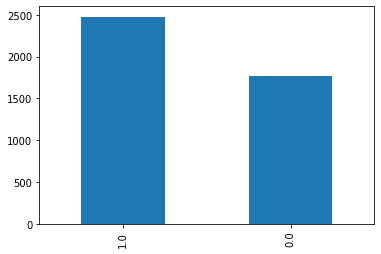

In [49]:
train_data['sentiment'].value_counts().plot(kind='bar')

In [50]:
print(train_data.groupby('sentiment').size().reset_index(name='count'))

   sentiment  count
0        0.0   1774
1        1.0   2476


In [51]:
## 토큰화
mecab = Mecab()

stopwords = ['이', '듯', '으로', '고', '인', '와', '하다', '의', '한', '다,', '은', '를', '가', '좀', 
             '자', '게', '도', '과', '네', '들', '는', '지', '잘', '에', '을', '걍', '임', '하']

In [52]:
###
# 훈련 데이터 토큰화
train_data['tokenized'] = train_data['token'].apply(lambda x: [item for item in x if item not in stopwords])

# 테스트 데이터 토큰화
test_data['tokenized'] = test_data['token'].apply(lambda x: [item for item in x if item not in stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
## 단어 & 길이 분포 확인

# 악성 댓글 & 일반 댓글에 어떤 단어들이 많이 등장하는지
negative_words = np.hstack(train_data[train_data.sentiment == 1]['token'].values)
positive_words = np.hstack(train_data[train_data.sentiment == 0]['token'].values)

In [54]:
# 각 단어에 대한 빈도수 카운트
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[("['미친', '인간', '들']", 2), ("['게', '이야']", 2), ("['김', '여사']", 2), ("['ㅂㅅ']", 2), ("['얼마', '못', '살', '겄다', '너', '도', '쯧쯧', '부디', '사고', '없길']", 1), ("['ㅋㅋㅋㅋ', '이', '나라', '에도', 'ㅇ', 'ㅐ', 'ㅁ', 'ㅣ', 'ㄷ', 'ㅣ', '진', '사람', '많구나', '우리나라', '에만', '있을', '줄', '알았는데']", 1), ("['주차', '해', '놓은', '위치', '봐라', '와', '김', '여사', '네', 'ㅡㅡ']", 1), ("['내', '가', '양', '떼', '야', '베지테', '리안', '이런', '거', '자기', '가', '하는', '건', '선한', '거고', '남한', '테', '는', '엉', '정', '한', '잣', '대', '지긋지긋하다']", 1), ("['교육부', '는', '뭐', '하는', '거야', '쓰', '벌']", 1), ("['겁', '이', '없는', '건', '가', '생각', '이', '없는', '건지']", 1), ("['전통', 'ㅇㅈㄹ']", 1), ("['인종차별', '하는', '저런', '인간', '은', 'ㅊ', '맞아도', '싸다']", 1), ("['이런데도', '극우', '새끼', '들', '과', '극우', '정당', '은', '소방관', '처우', '개선', '에', '반대', '하지']", 1), ("['아', '저런', '쪼', '다', '새기']", 1), ("['차', '달리는', '영상', '만', '2분', '동안', '처', '보여주노', 'ㅅㅂ', '답답하구로']", 1), ("['이', '새끼', '뒤', '도', '털어', '봐라']", 1), ("['짜장', '은', '빼', '마봉', '춘아']", 1), ("['개', '같은', '새끼', '들이라면서', '보고', '있었는데', '마지막', '에', '진짜', '개',

부정 리뷰의 평균 길이: 83.8325817361894
긍정 리뷰의 평균 길이: 84.74757673667204


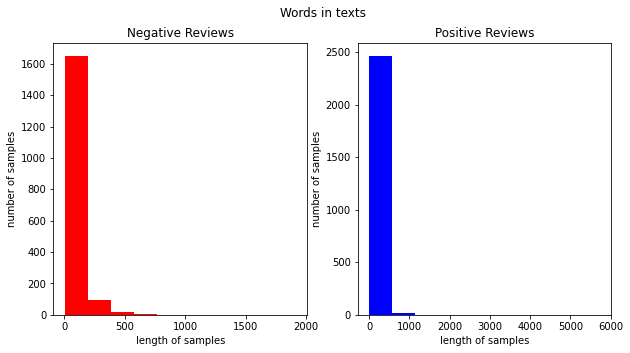

In [55]:
# 각각 길이 분포 확인
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['sentiment']==0]['token'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이:', np.mean(text_len))

text_len = train_data[train_data['sentiment']==1]['token'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Positive Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이:', np.mean(text_len))

plt.show()

In [56]:
X_train = train_data['token'].values
y_train = train_data['sentiment'].values
X_test = test_data['token'].values
y_test = test_data['sentiment'].values

In [57]:
## 정수 인코딩

# 단어 집합 생성
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [58]:
# 등장 횟수가 1회인 단어들은 제외

threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0   # 등장 빈도수 < threshold 인 단어의 개수 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총합
rare_freq = 0  # 등장 빈도수 < threshold 인 단어의 등장 빈도수 총합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받아옴.
for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value

  # 단어의 등장 빈도수 < threshold 이면
  if value < threshold:
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

print('단어 집합의 크기:', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s' % (threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어의 비율:', (rare_cnt / total_cnt) * 100) 
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율:', (rare_freq / total_freq) * 100)

단어 집합의 크기: 11589
등장 빈도가 1번 이하인 희귀 단어의 수: 6962
단어 집합에서 희귀 단어의 비율: 60.074208300975066
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 11.410869992788305


In [59]:
# 등장 빈도수가 1인 단어들의 수를 제외한 단어의 개수 -> 단어 집합의 최대 크기로 제한

# 전체 단어 개수 중 빈도수 2 이하인 단어 개수는 제거
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2

vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기:', vocab_size)

단어 집합의 크기: 4629


In [60]:
# 정수 인쾽 실행: 4629보다 큰 숫자가 부여된 단어들은 OOV로 변환

tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [61]:
# 인코딩 결과 확인
print(X_train[:3])
print(X_test[:3])

[[1301, 36, 151, 1, 111, 8, 2973, 607, 152, 927], [65, 2, 58, 395, 763, 2192, 1, 1491, 1769, 1491, 608, 16, 1302, 108, 1156, 352, 105, 706], [519, 70, 2193, 2194, 462, 53, 373, 421, 28, 221]]
[[230, 302, 165, 118, 4, 368, 1399, 2083, 1, 4397, 804, 1825, 1270, 169, 1, 1, 169, 1, 767, 1, 30, 1, 368, 1, 2662, 3458, 11, 705, 3956, 55, 1066, 1201, 152, 101, 1, 481, 1, 4, 1652, 1, 169, 5, 2850, 1, 962, 66, 3, 1, 1, 2730, 1138, 1, 1519, 165, 1, 119, 4589, 174, 3, 1, 1133, 15, 1, 9, 1, 293, 4587, 3329, 613, 2, 1, 1, 1, 1627, 1, 632, 651, 538, 3458, 165, 2843, 1, 10], [306, 1, 141, 1629, 1, 1165, 4587, 21, 1, 21, 29], [1, 230, 1, 11, 96, 24]]


리뷰의 최대 길이: 983
리뷰의 평균 길이: 14.355764705882352


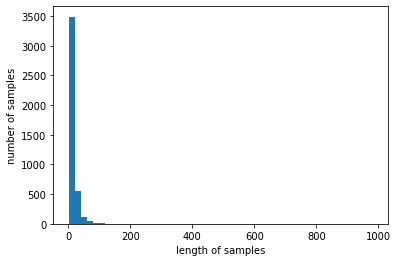

In [62]:
## 패딩

# 전체 데이터에서 가장 길이가 긴 리뷰 & 전체 데이터의 길이 분포 확인
print('리뷰의 최대 길이:', max(len(l) for l in X_train))
print('리뷰의 평균 길이:', sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [63]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if len(s) <= max_len:
      cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s' % (max_len, (cnt / len(nested_list)) * 100))

In [64]:
max_len = 80
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 80 이하인 샘플의 비율: 99.08235294117647


In [65]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [66]:
## GRU 감성분석

from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [67]:
# 모델 설계
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

In [68]:
# 모델 검증
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [69]:
# 모델 훈련
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
57/57 [==============================] - 19s 285ms/step - loss: 0.7231 - acc: 0.6550 - val_loss: 0.5000 - val_acc: 0.7624

Epoch 00001: val_acc improved from -inf to 0.76235, saving model to best_model.h5
Epoch 2/15
57/57 [==============================] - 10s 169ms/step - loss: 0.4381 - acc: 0.8441 - val_loss: 0.4324 - val_acc: 0.8071

Epoch 00002: val_acc improved from 0.76235 to 0.80706, saving model to best_model.h5
Epoch 3/15
57/57 [==============================] - 12s 211ms/step - loss: 0.2521 - acc: 0.9006 - val_loss: 0.6232 - val_acc: 0.7576

Epoch 00003: val_acc did not improve from 0.80706
Epoch 4/15
57/57 [==============================] - 12s 207ms/step - loss: 0.1932 - acc: 0.9247 - val_loss: 0.4810 - val_acc: 0.8047

Epoch 00004: val_acc did not improve from 0.80706
Epoch 5/15
57/57 [==============================] - 12s 209ms/step - loss: 0.1421 - acc: 0.9462 - val_loss: 0.5334 - val_acc: 0.8094

Epoch 00005: val_acc improved from 0.80706 to 0.80941, saving m

In [70]:
# 테스트 정확도 확인
loaded_model = load_model('best_model.h5')
print('\n테스트 정확도: %4f' % (loaded_model.evaluate(X_test, y_test)[1]))

34/34 [==============================] - 1s 20ms/step - loss: 0.5066 - acc: 0.8136

테스트 정확도: 0.813559


In [102]:
## 악성댓글 예측

def sentiment_predict(new_sentence):
  new_sentence = mecab.morphs(new_sentence)                               # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence])                  # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len)                      # 패딩
  score = float(loaded_model.predict(pad_new))                            # 예측
  if score > 0.4:
    print("{:.2f}% 확률로 악성 댓글입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 일반 댓글입니다.".format((1 - score) * 100))

In [103]:
sentiment_predict('쓰레기 새끼들아')

41.26% 확률로 악성 댓글입니다.


In [104]:
sentiment_predict('그냥 성격이 다른 거지 누가 틀리고 말고는 아닌 거 같은데 ,,')

79.38% 확률로 일반 댓글입니다.
